In [1]:
# Reimportar librerías tras el reinicio
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#!pip install openpyxl

In [13]:
# Cargar archivo nuevamente
file_path = "Encuesta Digital Girls_SP&ENG_A.xlsx"
df_new = pd.read_excel(file_path)
df_new.head()

,Label,Dibujar o pintar,Inventar historias,"Actuar, bailar y cantar",Contruir cosas con bloques,Hacer experimentos o jugar con química,"Observar insectos, plantas o estrellas",Hacer manualidades,Hacer preguntas sobre comó funcionan las cosas,Hacer deporte,...,Jugar con animales,Jugar con ordenadores o videojuegos,Resolver acertijos,Aprender sobre el cuerpo humano,Hacer cosas en equipo,Estar solo,Jugar a ser profesores,Asignatura1,Asignatura1.1,Personalidad
0,NEGOCIOS Y FINANZAS,2,1,1,3,1,1,3,2,1,...,1,1,3,3,3,1,3,matemáticas,idiomas,Organizador
1,NEGOCIOS Y FINANZAS,3,3,3,2,2,1,3,2,2,...,1,2,1,1,3,1,3,lengua,arte y dibujo,Social
2,NEGOCIOS Y FINANZAS,1,1,1,1,3,2,2,3,3,...,1,2,2,2,3,1,3,matemáticas,educación física,Realista
3,NEGOCIOS Y FINANZAS,1,2,1,3,2,1,1,3,3,...,2,2,2,1,3,2,2,matemáticas,ciencias,Organizador
4,NEGOCIOS Y FINANZAS,3,2,1,2,1,1,1,2,3,...,1,2,3,2,3,1,2,historia,arte y dibujo,Social


In [15]:
df_new['Label'].value_counts()

NEGOCIOS Y FINANZAS                     106
TEGNOLOGIA E INFORMATICA                 62
SALUD Y MEDICINA                         43
DERECHO Y CIENCIAS SOCIALES              35
INGENIERIA Y CONSTRUCCION                32
EDUCACIÓN Y FORMACIÓN                    25
COMUNICACIÓN Y MEDIOS                    25
CREATIVAS Y ARTISTICAS                   13
CIENCIAS CIENTIFICAS E INVESTIGACION      8
NATURALEZA Y MEDIO AMBIENTE               7
Name: Label, dtype: int64

In [16]:
# Preprocesamiento
df_model = df_new.copy()
le = LabelEncoder()
df_model['Label'] = le.fit_transform(df_model['Label'])
df_model = pd.get_dummies(df_model, columns=['Asignatura1', 'Asignatura1.1', 'Personalidad'])

X = df_model.drop(columns=['Label'])
y = df_model['Label']

In [17]:
# Separación
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Limpieza de columnas
X_train.columns = [col.replace('[', '').replace(']', '').replace('<', '_').replace('>', '_') for col in X_train.columns]
X_test.columns = X_train.columns
X_test.columns

Index(['Dibujar o pintar', 'Inventar historias', 'Actuar, bailar y cantar',
       'Contruir cosas con bloques', 'Hacer experimentos o jugar con química',
       'Observar insectos, plantas o estrellas', 'Hacer manualidades',
       'Hacer preguntas sobre comó funcionan las cosas', 'Hacer deporte',
       'Leer libros', 'Presentar cosas en publico', 'Jugar con animales',
       'Jugar con ordenadores o videojuegos', 'Resolver acertijos',
       'Aprender sobre el cuerpo humano', 'Hacer cosas en equipo',
       'Estar solo', 'Jugar a ser profesores', 'Asignatura1_arte y dibujo',
       'Asignatura1_ciencias', 'Asignatura1_educación física',
       'Asignatura1_física y quimica', 'Asignatura1_historia',
       'Asignatura1_idiomas', 'Asignatura1_lengua', 'Asignatura1_matemáticas',
       'Asignatura1_música y danza', 'Asignatura1.1_ arte y dibujo',
       'Asignatura1.1_ ciencias', 'Asignatura1.1_ educación física',
       'Asignatura1.1_ física y quimica', 'Asignatura1.1_ historia',
   

In [18]:
# Entrenar modelo
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train, y_train)

C:\Users\jeca\anaconda3\envs\nlp_portilla\lib\site-packages\xgboost\core.py:158: UserWarning: [00:31:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=10, num_parallel_tree=None, ...)

In [19]:
# Predicciones
y_pred = model.predict(X_test)

In [20]:
# Matriz de confusión y Accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
labels = le.inverse_transform(sorted(y_test.unique()))

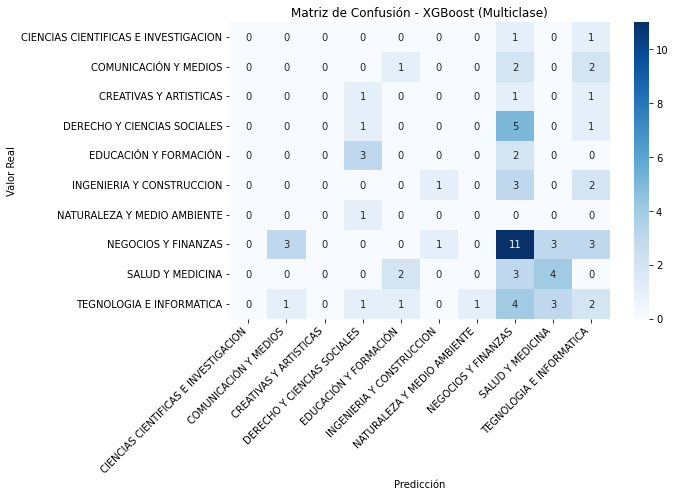

In [21]:
# Visualización
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - XGBoost (Multiclase)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
accuracy

0.2638888888888889